# Testing the null hypothesis H0: There is no difference between temperature climatologies from 1951-1980 and 1991-2020!

We use monthly mean data from station observations that are part of the GHCN data base. 
The code an extension of the code developed for the confidence interval calculations (see unit 7). The main purpose of this coding activity: Conduct a formal t-test and find stations and months for which we can reject the null hypothesis. In other words we want to explore where in NY and during which season we have the strongest data support for a significant warming.

Note: In this notebook we read a list of station id numbers (and additional 'metadata' information) from a text file that has all of the NY stations listed. Many stations do not have complete time series over the whole time period 1951-2018, so those are discarded. 




## 1. Code development

### 1.1 Importing our own set of support functions

In this script you notice we do not define the function for downloading the data from the ACIS server. 

Instead, we can separate the function definitions from our Notebook and import the functions with the same syntax that we use to import packages like _numpy_ or _scipy.stats_. This importing of Python code from separate files is known as import of _modules_. (The file is pure Python code and must have the extension *.py*.) 

Our Python script is called support.py (see GitHub repository unit8, download the script file, and upload it here into directory *unit8*). Note the ending must be .py for this Python code text file. This is referred to as 'import of modules'.

**Download the file support.py from GitHub (see folder unit8) and upload it into the same folder where you have this notebook file. The file must be named _support.py_ !**


Note: Packages are more complex, consisting of entire folders and subfolders with Python code. So modules are much simpler to maintain and a good first start to get your useful functions organized.




### 1.2 Importing all packages and our own module as spt

And check what we imported and how the functions work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats


import support as spt
# new: use function help() to see the content of the imported module and the doc-string information
help(spt)


Help on module support:

NAME
    support - Support module for working with GHCN data:

DESCRIPTION
    # Defined functions:
    # ------------------
    #       (1)get_station_monthly: 
    #                request a station time series
    #                from the Applied Climate Information System
    #                http://www.rcc-acis.org/index.html
    #       (2)get_station_list:
    #                support function that reads a local text file with
    #                all GHCN stations in state of NY
    #                The local file needed is expected to be located in
    #                the folder ../data (if you are working with notebooks in directory unit8)
    
    # Author: OET
    # Note: Code designed for ATM315/ENV315 Python introduction

FUNCTIONS
    get_station_list(sid_code='USW')
        Reads the local text file from ../data/ghcnd_stations_NY.txt and finds 
        stations with station identifier starting with specific string.
        Parameters:
        

### Reading the file with the NY station data information (metadata)

In [2]:
# Get station list from local file
sidlist,latlist,lonlist,elevlist,namelist=spt.get_station_list(sid_code="USW")
print ("number of stations starting with 'USW' (Airport stations)",len(sidlist))

finding all stations in file  ../data/ghcnd_stations_NY.txt
with station identifier string starting with 'USW
------------------------------------------------------------
USW00004724  43.1072 -78.9453   178.3  NIAGARA FALLS INTL AP
USW00004725  42.1997 -75.9850   489.5  BINGHAMTON HCN 72515
USW00004727  42.7500 -76.9000   187.1  GENEVA SAMPSON AFB
USW00004742  44.6500 -73.4667    71.9  PLATTSBURGH INTL AP
USW00004781  40.7939 -73.1017    25.6  ISLIP LI MACARTHUR AP 72505
USW00004782  42.8333 -73.9167    67.1  SCHENECTADY
USW00004789  41.5092 -74.2650   111.3  MONTGOMERY ORANGE AP
USW00014708  40.7333 -73.6000    29.9  MITCHELL FLD
USW00014714  41.5000 -74.1000   177.1  STEWART FLD
USW00014715  44.0500 -75.7333   214.0  WHEELER SACK FLD AAF 74370
USW00014717  43.2333 -75.4000   158.2  GRIFFISS AFB
USW00014719  40.8436 -72.6322    20.4  WESTHAMPTN GABRESKI AP
USW00014732  40.7794 -73.8803     3.4  NEW YORK LAGUARDIA AP 72503
USW00014733  42.9486 -78.7369   211.2  BUFFALO HCN 72528
USW000

### 1.3 Preparing the data for statistical calculations

<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Check which stations have complete data, and  form a final list of stations to use.
<BR>
<BR>
</P>


**The code below is one 'basic' level approach to deal with storing all station data
that have complete time series without any missing values.**

Here we use a simple approach: 
- Access all the station data from the ACIS server. 
- For each station, the downloaded data is checked for missing values.
- If data are complete for the whole period (1951 to 2018, see variable year1, year2 above), then the station metdata information (station id, latitude, longitude, elevation, and full station name) is appended to new lists.

Once we have screened our station data we can do our calculation and plotting for any of those stations by selecting one of the station id names.

In [3]:
varname="avgt"
year1,year2= 1951,2020

In [4]:
print ("data complete between %4d and %4d?" %(year1,year2))
complete_sid=[]
complete_lat=[]
complete_lon=[]
complete_elev=[]
complete_name=[]
i=0
for station_id in sidlist:
    x,y=spt.get_stationdata_monthly(station_id,varname,startyear=year1,endyear=year2)
    if len(x)==0:
        pass
    else:
        x=np.array(x)
        y=np.array(y)
        # check for completeness in data (no NAN allowed)
        iuse=np.logical_and(x>dt.datetime(1950,12,31),x<dt.datetime(2021,1,1))
        imiss=np.isnan(y[iuse])
        if any(imiss): # NAN values detected in time series
            pass
            #print (3*"-"+"station: "+station_id+" variable "+varname+" has NAN values.")
        else: # no NAN detected
            print (3*"+"+"station: "+station_id+" variable "+varname+" is complete.")
            complete_sid.append(station_id)
            complete_lat.append(latlist[i])
            complete_lon.append(lonlist[i])
            complete_elev.append(elevlist[i])
            complete_name.append(namelist[i])
    i=i+1
nstation=len(complete_sid)
print ("number of stations, number of stations with complete data", i,nstation)


data complete between 1951 and 2020?
>send data request to http://data.rcc-acis.org/StnData?sid=USW00004724&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00004724
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00004725&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00004725
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00004727&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00004727
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00004742&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00004742
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.

>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00064756&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00064756
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00064758&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00064758
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00064775&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00064775
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00064776&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00064776
year range: 1951 - 2020
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00093732

In [5]:
print("stations that are available")
for i,sid in enumerate(complete_sid): # new syntax
    print (i,sid,complete_name[i])


stations that are available
0 USW00014732  NEW YORK LAGUARDIA AP 72503
1 USW00014733  BUFFALO HCN 72528
2 USW00014735  ALBANY AP HCN 72518
3 USW00014750  GLENS FALLS AP 72522
4 USW00014768  ROCHESTER GTR INTL AP HCN 72529
5 USW00014771  SYRACUSE HANCOCK INTL AP GSN HCN 72519
6 USW00094725  MASSENA INTL AP
7 USW00094728  NEW YORK CNTRL PK TWR HCN 72506
8 USW00094789  NEW YORK JFK INTL AP 74486


<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Read data for one of the stations stored in the list of complete stations.
<BR>
<BR>
</P>




In [6]:
station_index=0 #
print (complete_sid[station_index])
print (complete_name[station_index])
x,y=spt.get_stationdata_monthly(complete_sid[station_index],\
                            varname,startyear=year1,endyear=year2)
x=np.array(x)
y=np.array(y)


USW00014732
 NEW YORK LAGUARDIA AP 72503
>send data request to http://data.rcc-acis.org/StnData?sid=USW00014732&&sdate=1951-01-1&&edate=2020-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014732
year range: 1951 - 2020
> still waiting for response ...
>... done


<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Select the data from x and y for the two 30 climate period: 1951-1980 and 1991-2020
<BR>
<BR>
</P>
    
Assign the results to new variables and check with np.shape the dimensions and size of the data array. You should have 360 data left in the arrays. 


In [7]:
# create first subsample
iclim1=np.logical_and(x>dt.datetime(1950,12,31),x<dt.datetime(1981,1,1))
xclim1=x[iclim1]
yclim1=y[iclim1]
print("check climatology data sample 1:")
print(xclim1[0]," - ",xclim1[-1])
print(np.shape(yclim1))

check climatology data sample 1:
1951-01-01 00:00:00  -  1980-12-01 00:00:00
(360,)


In [8]:
# create second subsample
iclim2=np.logical_and(x>dt.datetime(1990,12,31),x<dt.datetime(2021,1,1))
xclim2=x[iclim2]
yclim2=y[iclim2]
print("check climatology data sample 2:")
print(xclim2[0]," - ",xclim2[-1])
print(np.shape(yclim2))

check climatology data sample 2:
1991-01-01 00:00:00  -  2020-12-01 00:00:00
(360,)


<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Calculate the mean and standard deviation for each month (using np.reshape)
<BR>
<BR>
</P>
    


In [9]:
yhelp1=np.reshape(yclim1,newshape=(30,12))
yhelp2=np.reshape(yclim2,newshape=(30,12))

ymean1=np.mean(yhelp1,axis=0)
ymean2=np.mean(yhelp2,axis=0)
ystd1=np.std(yhelp1,axis=0)
ystd2=np.std(yhelp2,axis=0)

<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Confidence intervals
<BR>
<BR>
</P>

In [11]:
# sample size here is 30 years, but we should make it a data-dependent value.
#n1, n2 = 30, 30
n1= np.shape(yhelp1)[0] # rows are the years
n2= np.shape(yhelp2)[0] # rows are the years (could be different from sample 1) 
df1=n1-1
df2=n2-1
alpha=0.95 # for both samples
tint1=stats.t.interval(alpha,df1) # returns lists
tint2=stats.t.interval(alpha,df2) # returns lists
# arrays for the upper and lower confidence intervals
cf1=np.zeros(shape=[2,12])
cf2=np.zeros(shape=[2,12]) # a true independent copy 
for i in range(12):
    cf1[:,i]=np.array(tint1)*ystd1[i]/np.sqrt(n1)
    cf2[:,i]=np.array(tint2)*ystd2[i]/np.sqrt(n2)
    i+=1
    

## 2. Results

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 1: Present the climatologies in a graph or two that make it easy to see the differences between the two periods, and how much the confidence intervals overlap.
<BR>
<BR>
</P>
    
- Tip: Check the function plt.errorbar

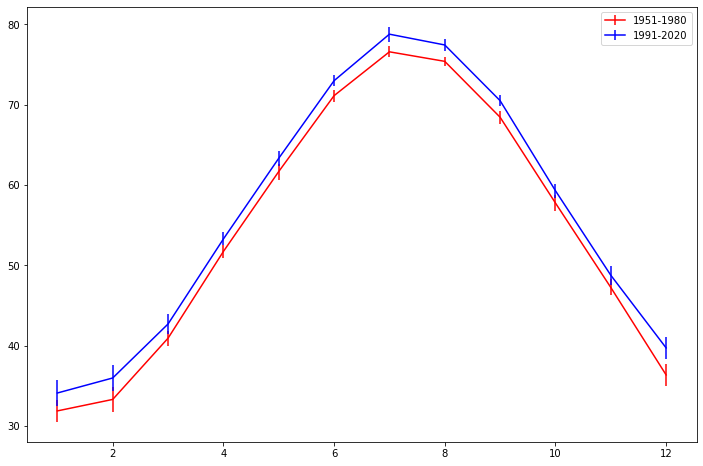

TypeError: 'numpy.float64' object is not iterable

In [24]:
# your code
plt.figure(figsize=(12,8))



#plt.plot(yhelp1,yhelp2)

#plt.plot(cf1,cf2)


month=np.arange(1,13,1)
plt.errorbar(month,ymean1,cf1[1,:],color='red',label='1951-1980')
plt.errorbar(month,ymean2,cf2[1,:],color='blue',label='1991-2020')
plt.legend()
plt.show()
sig=.05
#for i,p in enumerate(pvalue):
    #if p<sig:
        #plt.plot(month[i],30,'o',color='purple')
    #else:
        #plt.plot(month[i],30,'x',color='gray')

In [ ]:
help(plt.errorbar)

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 2: Calculate the t-test with the help of the function stats.ttest_ind. Choose a winter month and a summer month (or can you figure out how to apply the t-test to all months?). Where you expect to reject the null hypothesis and obtain the smallest p-value?

<BR>
<BR>
</P>
    
Tip: Check out the help or google examples for the application of the function Scipy *stats.ttest_ind*.
(see link below)

Print out the essential information: 
- the difference in the mean, 
- the t-statistic, the p-value, 
- the test decision, 
- and interpretation of the sign if the difference (sign of the t-statistic).



In [30]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

month 1: difference = 2.228333333333328, p=0.03867041772248581 < significant at 5% level
month 2: difference = 2.6696666666666715, p=0.017880567342335143 < significant at 5% level
month 3: difference = 1.7679999999999936, p=0.02616521136472449 < significant at 5% level
month 4: difference = 1.5556666666666743, p=0.009956561253183291 < significant at 5% level
month 5: difference = 1.649000000000001, p=0.01781922752468529 < significant at 5% level
month 6: difference = 1.8613333333333344, p=0.00047718946841359387 < significant at 5% level
month 7: difference = 2.1950000000000216, p=0.0003541021009306671 < significant at 5% level
month 8: difference = 2.038666666666657, p=8.039918042146177e-05 < significant at 5% level
month 9: difference = 2.060999999999993, p=0.0003318590581562674 < significant at 5% level
month 10: difference = 1.5296666666666638, p=0.021331451039036057 < significant at 5% level
month 11: difference = 1.5206666666666564, p=0.05087482658849439
month 12: difference = 3.3

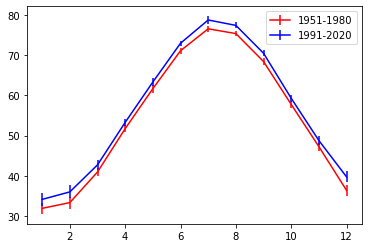

TypeError: 'numpy.float64' object is not iterable

In [28]:
# your code for t-test calculation
month=np.arange(1,13,1)
for m in month:
    t,pvalue=stats.ttest_ind(yhelp1[:,m-1],yhelp2[:,m-1],equal_var=False,nan_policy='propagate')
    if pvalue<.05:
        print(f"month {m}: difference = {ymean2[m-1]-ymean1[m-1]}, p={pvalue} < significant at 5% level")
    else:
        print(f"month {m}: difference = {ymean2[m-1]-ymean1[m-1]}, p={pvalue}")
        
        
        
        
month=np.arange(1,13,1)
plt.errorbar(month,ymean1,cf1[1,:],color='red',label='1951-1980')
plt.errorbar(month,ymean2,cf2[1,:],color='blue',label='1991-2020')
plt.legend()
plt.show()
sig=.05
for i, p in enumerate(pvalue):
    if p<sig:
        plt.plot(month[i],30,'o',color='purple')
    else:
        plt.plot(month[i],30,'x',color='gray')

In [15]:
# your code for plotting / printing the p-values
# and decide if statistically significant at 5% significance level 
# (p<0.05)

## 3 Summary and conclusion

Some comments/remarks here.


---
### References

- [Introduction to import of modules](https://www.programiz.com/python-programming/modules)
- [Function ttest_ind from scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- [Welch's form of the t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) (ttest_ind supports calculating this test statistic when we set the keyword parameter _equal_var=False_)

<P style="background-color:lightgreen;color:black;font-size:130%">
<BR>
Optional Practice: Create a Pandas DataFrame and export to CSV file
<BR>
<BR>
</P>

Take all lists objects with station metadata information and create a 
new DataFrame object. (see variables _sidlist_, _latlist_, _lonlist_, _elevlist_)
    
Show the first top rows of the DataFrame as a table.

Then call the function that exports the DataFrame to a CSV file.


The functions ('methods') to be used are: _df.head()_ and _df.to_csv('test.csv'_)




In [16]:
# Optional practice:
# Put the lists into a Pandas DataFrame